In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
from keras.models import load_model

# Load the model
loaded_model = load_model('latest_model_1.keras')

print("model loaded successfully")

model loaded successfully


In [4]:
path = './test_images/download (4).jpeg'
image = load_img(path)
image = np.array(image, dtype=np.uint8) #8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0 #get normalized o/p

In [5]:
#size of original image

h,w,d = image.shape
print("Height of the image: ",h)
print("Width of the image: ",w)

Height of the image:  168
Width of the image:  300


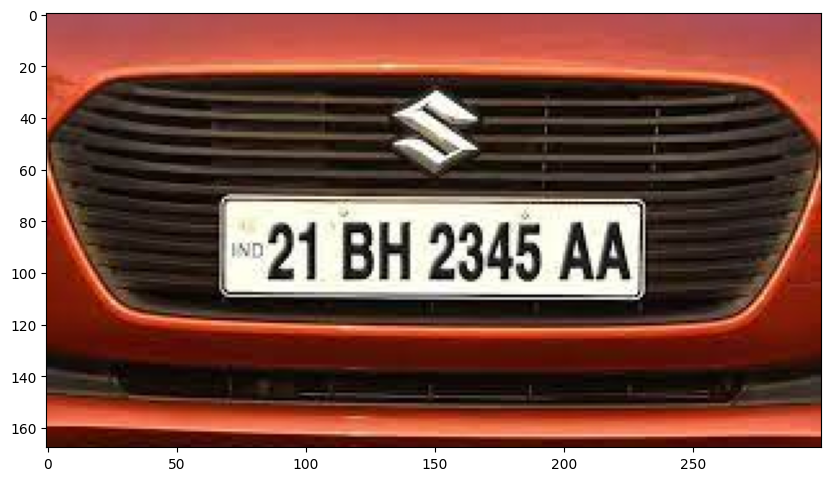

In [6]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
#make predictions
coords = loaded_model.predict(test_arr)
coords

1/1 [==============================] - 3s 3s/step


array([[0.28693658, 0.8335348 , 0.34486237, 0.6627223 ]], dtype=float32)

In [10]:
#denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 86.08097434, 250.06043315,  57.93687844, 111.33734465]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[ 86, 250,  57, 111]])

(86, 57) (250, 111)


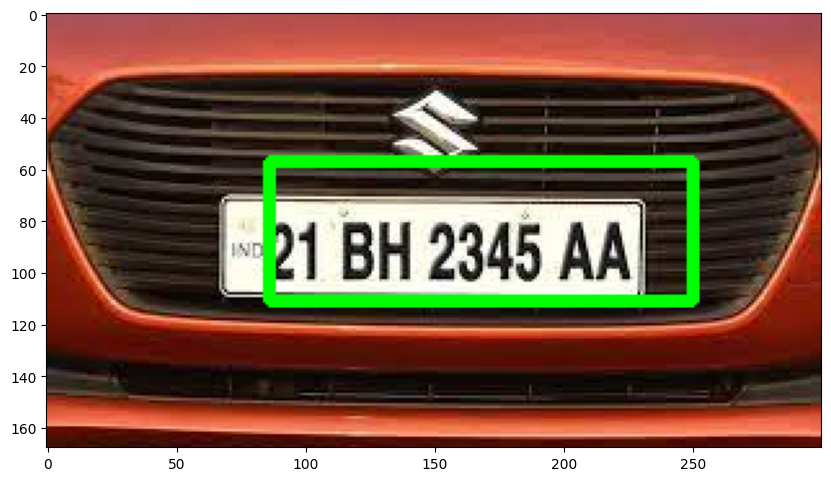

In [12]:
#draw bounding bow on top of the image
xmin,xmax,ymin,ymax = coords[0]
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [13]:
#Create pipeline model

path = './test_images/download (4).jpeg'
def object_detection(path):
    #read image
    image = load_img(path)
    image = np.array(image, dtype=np.uint8) #8 bit array (0,255)
    image1 = load_img(path,target_size=(224,224))
    #data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 #get normalized o/p
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    #make predictions
    coords = loaded_model.predict(test_arr)
    #denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    #draw bounding bow on top of the image
    xmin,xmax,ymin,ymax = coords[0]
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords

1/1 [==============================] - 0s 110ms/step
(86, 57) (250, 111)


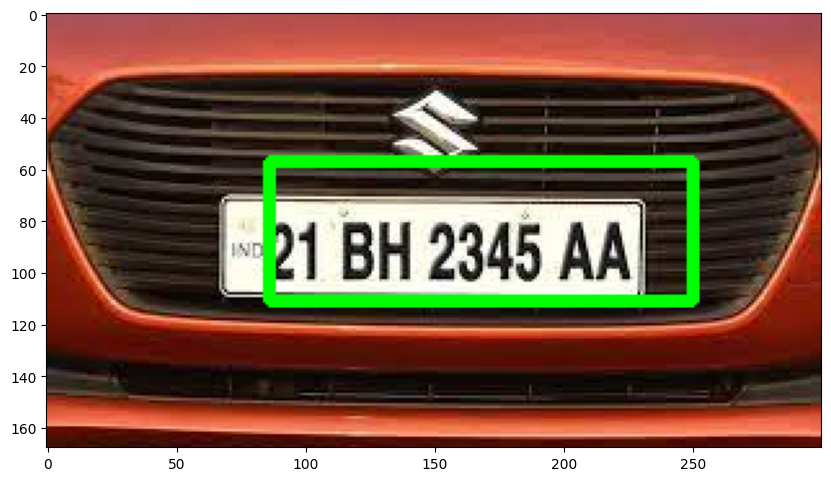

In [14]:
path = './test_images/download (4).jpeg'
image,cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

### Optical Character Recognition (OCR)

In [15]:
import pytesseract as pt

1/1 [==============================] - 0s 110ms/step
(86, 57) (250, 111)


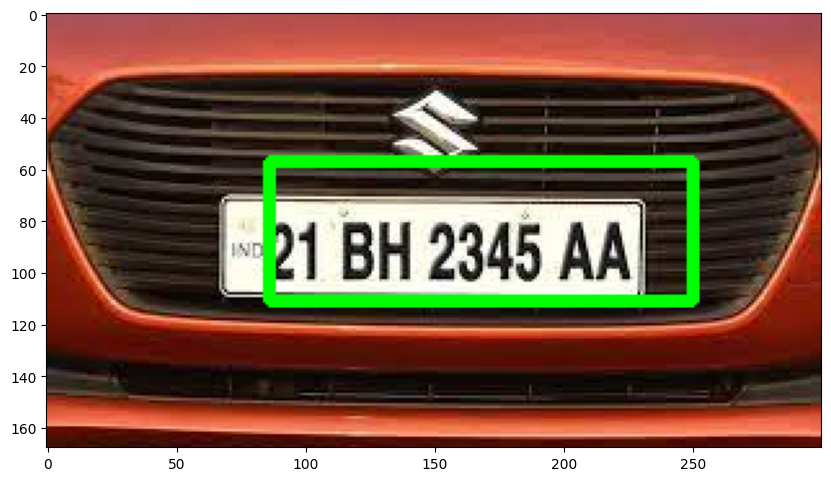

In [16]:
path = 'C:/Users/saira/project/test_images/download (4).jpeg'
image,cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [17]:
img = np.array(load_img(path))
xmin,xmax,ymin,ymax = cods[0]
roi = img[ymin:ymax,xmin:xmax]

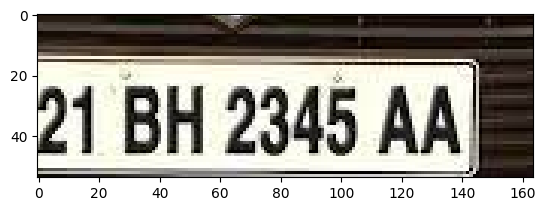

In [18]:
plt.imshow(roi)
plt.show()

In [19]:
#extract text from string
text = pt.image_to_string(roi)
print(text)

21 BH 2345 AA

